<a href="https://colab.research.google.com/github/vldzmtnsdl/ESAA-/blob/ESAA/1004_%EC%84%B8%EC%85%98%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
ratings=pd.read_csv("/content/drive/MyDrive/ratings_small.csv")

In [ ]:
pip install fastai

In [ ]:
from fastai import *

In [ ]:
from fastai.learner import *

ModuleNotFoundError: ignored

In [ ]:
a
from fastai.cnn_learner import *

ModuleNotFoundError: ignored

In [ ]:
val_indx=get_csv_idxs(len(ratings))
wd=2e-4
n_factors=50



NameError: ignored

In [24]:
pip install git+https://github.com/fastai/fastai1.git


  Cloning https://github.com/fastai/fastai1.git to /tmp/pip-req-build-wb_jnyfl
  Running command git clone -q https://github.com/fastai/fastai1.git /tmp/pip-req-build-wb_jnyfl


In [25]:
val_indx=get_csv_idxs(len(ratings))
wd=2e-4
n_factors=50

NameError: ignored

amazon reviews를 이용한 추천시스템 실습

In [27]:
pip install IPython


In [31]:
import IPython
from IPython import *

In [34]:
import numpy as np
import pandas as pd
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [36]:
electronics_data = pd.read_csv("/content/drive/MyDrive/ratings_Electronics (1).csv",names=['userId', 'productId','Rating','timestamp'])

In [37]:
electronics_data.head()

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [38]:
electronics_data.shape

(7824482, 4)

In [39]:
electronics_data=electronics_data.iloc[:1048576,0:]

In [40]:
electronics_data.dtypes

userId        object
productId     object
Rating       float64
timestamp      int64
dtype: object

In [41]:
electronics_data.describe()['Rating'].T

count    1.048576e+06
mean     3.973380e+00
std      1.399329e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

In [43]:
print("max of rating : %d" %(electronics_data.Rating.max()))
print("min of rating : %d" %(electronics_data.Rating.min()))

max of rating : 5
min of rating : 1


In [44]:
print('Number of missing values across columns:\n',electronics_data.isnull().sum())

Number of missing values across columns:
 userId       0
productId    0
Rating       0
timestamp    0
dtype: int64


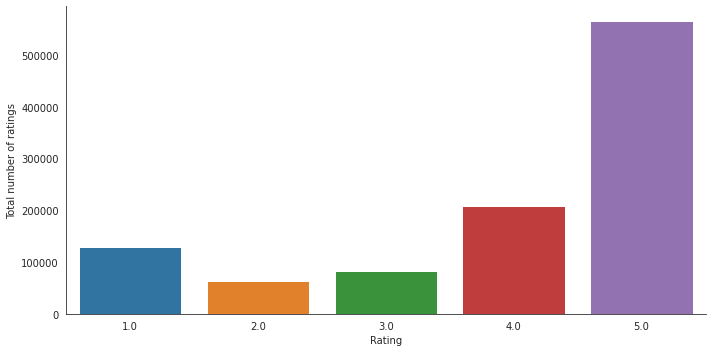

In [46]:
with sns.axes_style('white'):
  g=sns.factorplot("Rating",data=electronics_data,
                   aspect=2.0,kind='count')
  g.set_ylabels("Total number of ratings")

In [48]:
print("Total data")
print("-"*50)
print('\nTotal num of ratings:',electronics_data.shape[0])
print('Total num of Users:',len(np.unique(electronics_data.userId)))
print('Total num of products:',len(np.unique(electronics_data.productId)))

Total data
--------------------------------------------------

Total num of ratings: 1048576
Total num of Users: 786330
Total num of products: 61894


In [49]:
electronics_data.drop(['timestamp'],axis=1,inplace=True)

In [50]:
electronics_data.head()

,userId,productId,Rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


ratings 분석

In [51]:
num_of_rated_products_per_user=electronics_data.groupby(
    by='userId')['Rating'].count().sort_values(ascending=False)
num_of_rated_products_per_user.head()

userId
A5JLAU2ARJ0BO     412
A231WM2Z2JL0U3    249
A25HBO5V8S8SEA    164
A6FIAB28IS79      146
AT6CZDCP4TRGA     128
Name: Rating, dtype: int64

In [52]:
num_of_rated_products_per_user.describe()

count    786330.000000
mean          1.333506
std           1.385612
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         412.000000
Name: Rating, dtype: float64

In [53]:
#거의 모든 유저들이 하나의 아이템에만 평가...?

In [54]:
num_of_rated_products_per_user[num_of_rated_products_per_user>=2].count()

136821

In [56]:
786330/136821

5.747144078759839

In [57]:
quantiles=num_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Quantiles and their Values')

Text(0, 0.5, 'No of ratings by user')

Text(0.5, 0, 'Value at the quantile')

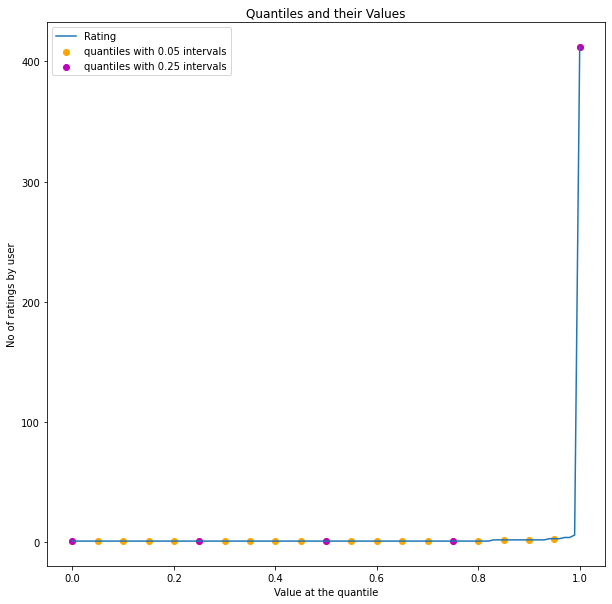

In [59]:
plt.figure(figsize=(10,10))
plt.title('Quantiles and their Values')
quantiles.plot()

plt.scatter(x=quantiles.index[::5],y=quantiles.values[::5],c='orange',label='quantiles with 0.05 intervals')
plt.scatter(x=quantiles.index[::25],y=quantiles.values[::25],c='m',label='quantiles with 0.25 intervals')
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

In [61]:
print('\n No of rated product more than 50 per user: {}\n'.format(
    sum(num_of_rated_products_per_user>=50)
))


 No of rated product more than 50 per user: 38



popularity based recommendation

In [62]:
new_df=electronics_data.groupby('productId').filter(lambda x:x['Rating'].count()>=50)

In [63]:
new_df.head()

,userId,productId,Rating
183,A1BKC6B7YHYTVV,0972683275,4.0
184,AWVFSIB42LHKJ,0972683275,4.0
185,A36MQBNADRH8YY,0972683275,5.0
186,A3SRXMPLAEZ6DP,0972683275,4.0
187,A20XXTXWF2TCPY,0972683275,5.0


In [64]:
new_df.shape

(677947, 3)

Text(0.5, 1.0, '# Ratings per Product')

Text(0.5, 0, 'product')

Text(0, 0.5, 'no of ratings per product')

[]

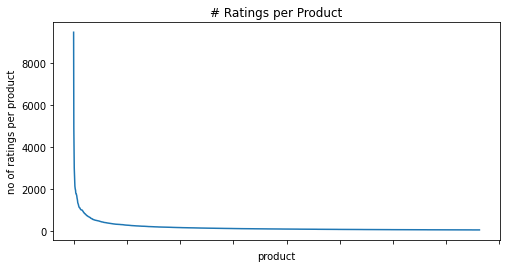

In [65]:
num_of_ratings_per_product=new_df.groupby(by='productId')['Rating'].count().sort_values(ascending=False)
fig=plt.figure(figsize=plt.figaspect(.5))
ax=plt.gca()
plt.plot(num_of_ratings_per_product.values)
plt.title('# Ratings per Product')
plt.xlabel('product')
plt.ylabel('no of ratings per product')
ax.set_xticklabels([])

plt.show()

In [66]:
new_df.groupby('productId')['Rating'].mean().head()

productId
0972683275    4.470980
1400501466    3.560000
1400501520    4.243902
1400501776    3.884892
1400532620    3.684211
Name: Rating, dtype: float64

In [67]:
new_df.groupby('productId')['Rating'].mean().sort_values(
    ascending=False
).head()

productId
B0000DYV9H    4.947368
B000053HC5    4.945783
B00009R96C    4.885714
B00005LE76    4.879310
B000I1X3W8    4.869565
Name: Rating, dtype: float64

In [68]:
new_df.groupby('productId')['Rating'].count().sort_values(
    ascending=False
).head()

productId
B0002L5R78    9487
B0001FTVEK    5345
B000I68BD4    4903
B000BQ7GW8    4275
B00007E7JU    3523
Name: Rating, dtype: int64

In [69]:
ratings_mean_count=pd.DataFrame(new_df.groupby('productId')['Rating'].mean())

In [71]:
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('productId')['Rating'].count())

In [72]:
ratings_mean_count['rating_counts'].max()

9487

<Figure size 432x432 with 0 Axes>

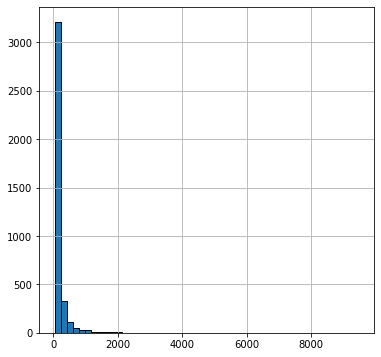

In [74]:
plt.figure(figsize=(6,6))
plt.rcParams['patch.force_edgecolor']=True
ratings_mean_count['rating_counts'].hist(bins=50)


<Figure size 432x432 with 0 Axes>

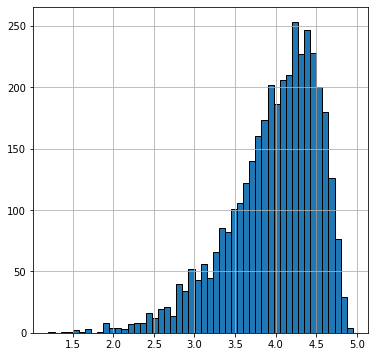

In [75]:
plt.figure(figsize=(6,6))
plt.rcParams['patch.force_edgecolor']=True
ratings_mean_count['Rating'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

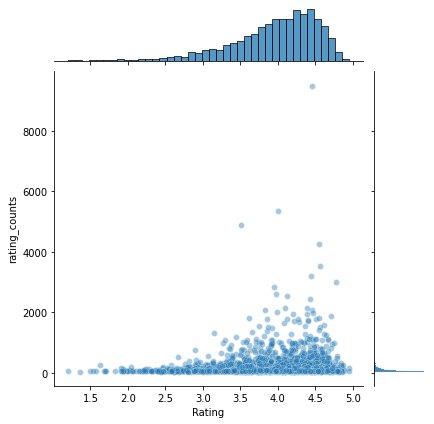

In [76]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

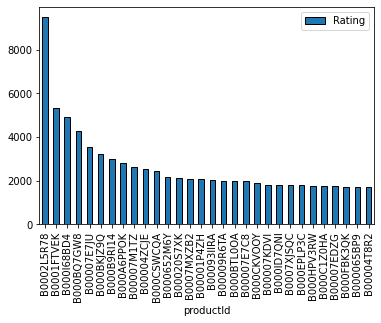

In [77]:
popular_products = pd.DataFrame(new_df.groupby('productId')['Rating'].count())
most_popular = popular_products.sort_values("Rating", ascending=False)
most_popular.head(30).plot(kind = "bar")